In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy
from tqdm import tqdm
import h5py

import calculation.MeanFieldv2 as MFv2
import calculation.CurrentMeirv2 as CsMv2
import calculation.SusceptibilitySimpv2 as Susceptv2
import settings.Constants as const

In [2]:
saddleFile = "h5_output_data/VT-space.hdf5"
shotFile = "h5_output_data/CurrentNoiseVT_results.hdf5"
    
##! Read data from the hdf5 file
with h5py.File(saddleFile, 'r') as f:
    domain = f['VTSpace/domain'][:]
    DRDataOne = f['VTSpace/DRDataOne'][:]
    DKDataOne = f['VTSpace/DKDataOne'][:]


with h5py.File(shotFile, 'r') as f:
    retardedNonIntZero = f['ShotNoise/retardedNonIntZero'][:]/100
    keldyshNonIntZero = f['ShotNoise/keldyshNonIntZero'][:]/100
    
    retardedNonIntOne = f['ShotNoise/retardedNonIntOne'][:]/100
    keldyshNonIntOne = f['ShotNoise/keldyshNonIntOne'][:]/100
    retardedIntOne = f['ShotNoise/retardedIntOne'][:]
    keldyshIntOne = f['ShotNoise/keldyshIntOne'][:]
    
    domainOne = f['ShotNoise/domainOne'][:]
    dominZero = f['ShotNoise/domainZero'][:]

In [3]:

retardedTotOne = retardedNonIntOne.real - 2*retardedIntOne.imag
keldyshTotOne = keldyshNonIntOne.real - keldyshIntOne.imag

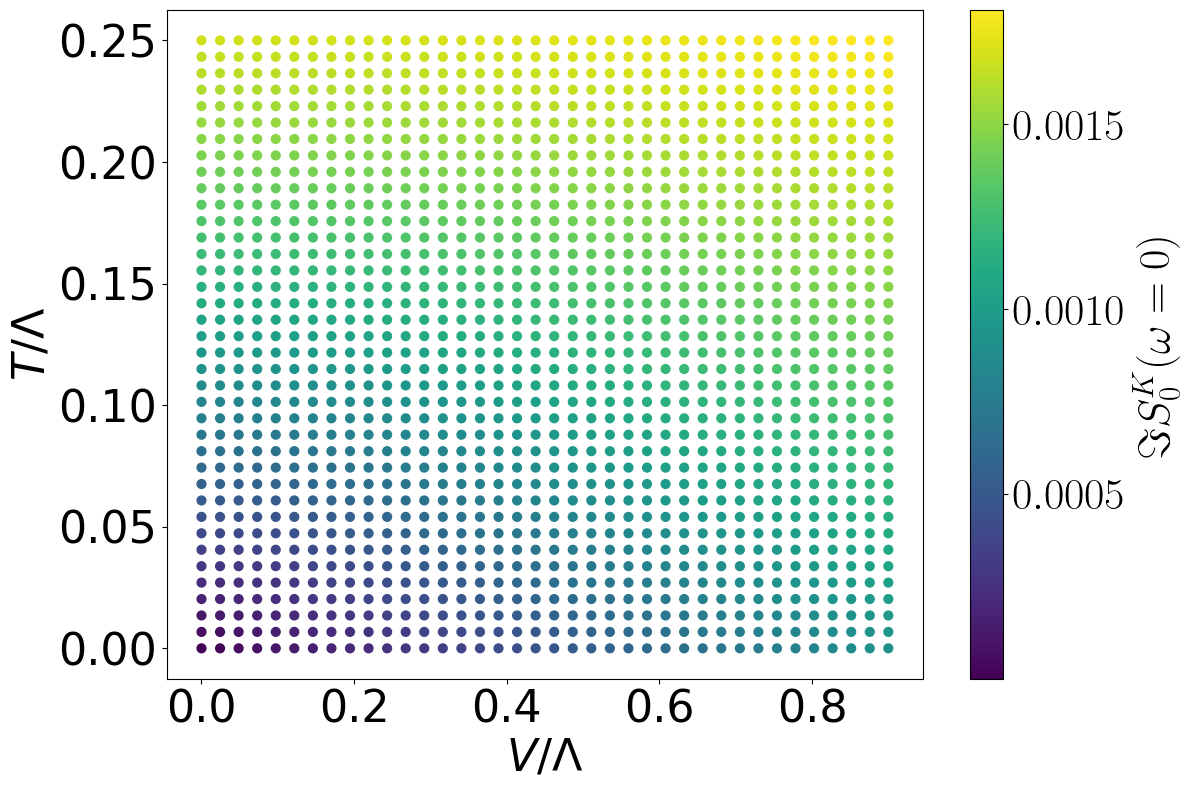

In [4]:

###* Keldysh NonInt Case

voltageSpace = domain[:,1]
TvalueSpace = domain[:,-1]

x = voltageSpace
y = TvalueSpace
z = keldyshNonIntZero[:, 1].real/100

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = plt.scatter(x/2, y/2, c=z, cmap='viridis', s=40)
cbar = plt.colorbar(sc)
cbar.set_label(r'$\Im S_0^K(\omega=0)$', fontsize=32)
cbar.ax.tick_params(labelsize=32)


plt.xlabel(r'$V/\Lambda$', fontsize=32)
plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

plt.tight_layout()
# plt.savefig('panelsCurrentNoise/ImSK_NonInt_VT.png', bbox_inches='tight', dpi=600)



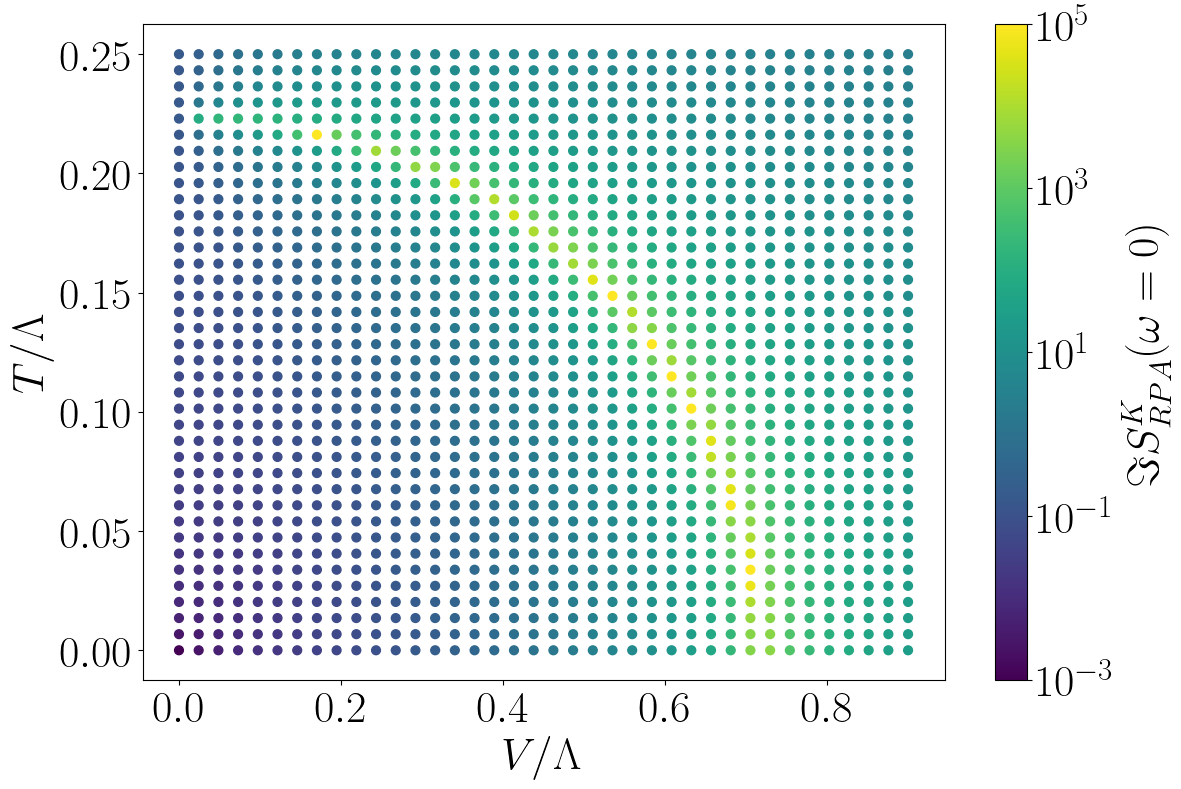

In [5]:

###* Keldysh RPA Case

voltageSpace = domain[:,1]
TvalueSpace = domain[:,-1]

x = voltageSpace
y = TvalueSpace
z = keldyshTotOne[:, 1]

vmin = 1e-3
vmax = 1e5

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = plt.scatter(x/2, y/2, c=z, cmap='viridis', norm=LogNorm(vmin=vmin, vmax=vmax), s=40)
cbar = plt.colorbar(sc)
cbar.set_label(r'$\Im S_{RPA}^K(\omega=0)$', fontsize=32)
cbar.ax.tick_params(labelsize=32)


plt.xlabel(r'$V/\Lambda$', fontsize=32)
plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

plt.tight_layout()
plt.savefig('panelsCurrentNoise/ImSK_RPA_VT.png', bbox_inches='tight', dpi=600)


In [6]:

FauxPlusNonInt = retardedNonIntZero[:,2].real/keldyshNonIntZero[:,2].real
FauxMinusNonInt = retardedNonIntZero[:,0].real/keldyshNonIntZero[:,0].real
dFomegaNonInt = (FauxPlusNonInt - FauxMinusNonInt)/(2*2e-3)

FauxPlusTotal = retardedTotOne[:,2]/keldyshTotOne[:,2]
FauxMinusTotal = retardedTotOne[:,0]/keldyshTotOne[:,0]
dFomegaTotal = (FauxPlusTotal - FauxMinusTotal)/(2*2e-3)



In [7]:
### check plots

# plt.plot(0.5/dFomegaTotal/2)
# plt.yscale('log')

# # plt.plot(dFomegaNonInt)
# TeffNonInt = 0.5/dFomegaNonInt/2
# TeffNonInt[TeffNonInt < 1e-5] = 0.0
# plt.plot(TeffNonInt)
# # plt.yscale('log')



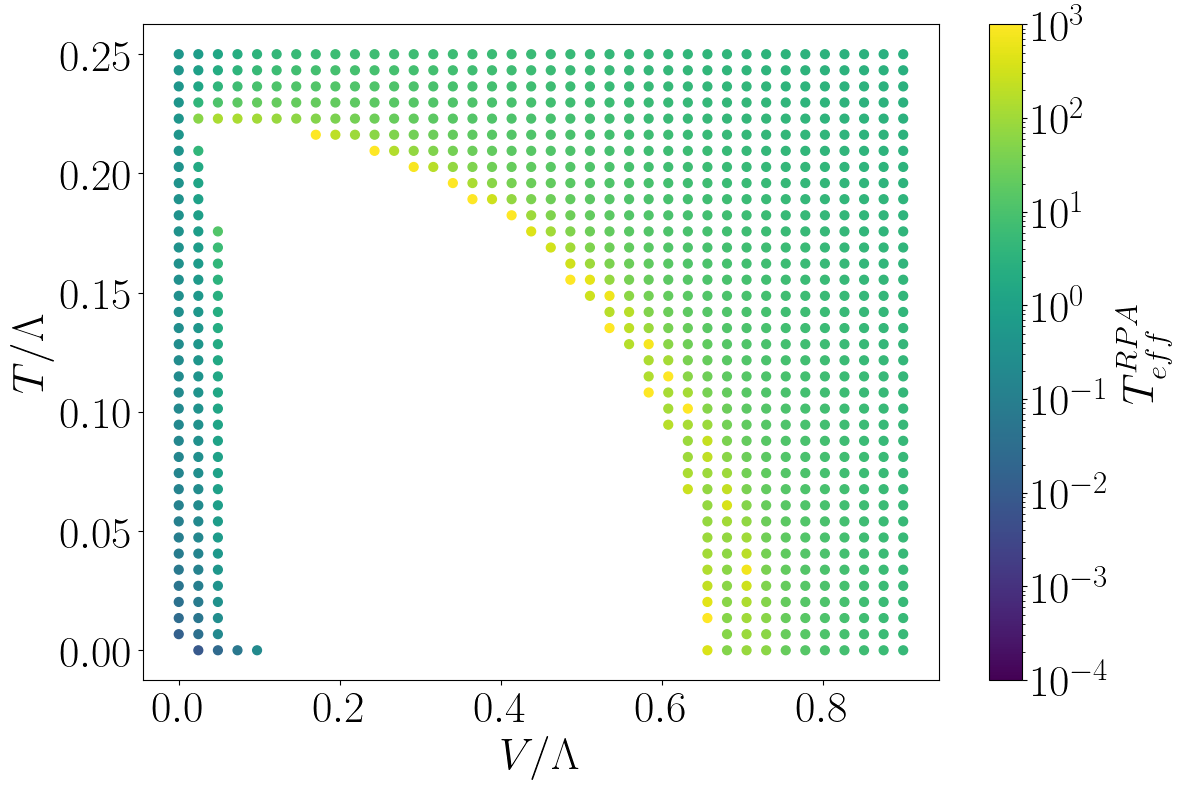

In [8]:

###* Keldysh RPA Case

voltageSpace = domain[1:,1]
TvalueSpace = domain[1:,-1]

# TeffRPA = np.abs(0.5/dFomegaTotal/2)
TeffRPA = 0.5/dFomegaTotal[1:]/2
# TeffRPA[TeffRPA < 1e-5] = np.nan

x = voltageSpace
y = TvalueSpace
z = TeffRPA

vmin = 1e-4
vmax = 1e3

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = plt.scatter(x/2, y/2, c=z, cmap='viridis', norm=LogNorm(vmin=vmin, vmax=vmax), s=40)
cbar = plt.colorbar(sc)
cbar.set_label(r'$T_{eff}^{RPA}$', fontsize=32)
cbar.ax.tick_params(labelsize=32)


plt.xlabel(r'$V/\Lambda$', fontsize=32)
plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

plt.tight_layout()
plt.savefig('panelsCurrentNoise/Teff_RPA_VT.png', bbox_inches='tight', dpi=600)


In [9]:

# ### Equilibrium case
# maskV_check = voltageSpace <= 1e-3

# keldyshNonInt3 = keldyshNonIntZero[:,0].real
# keldyshRPA3 = keldyshTotOne[:,0]

# ratioNonInt = keldyshNonInt3[maskV_check]/TvalueSpace[maskV_check]
# ratioRPA = keldyshRPA3[maskV_check]/TvalueSpace[maskV_check]

# fig, ax = plt.subplots(figsize=(12, 8))
# plt.rcParams['text.usetex'] = True
# plt.rcParams['font.family'] = 'serif'
# plt.plot(TvalueSpace[maskV_check][1:], 0.25*ratioNonInt[1:], '.', label="NonInt V=0")
# plt.plot(TvalueSpace[maskV_check][1:], 0.25*ratioRPA[1:], '.', label="RPA V=0")
# plt.xlabel(r'$T$', fontsize=32)
# plt.ylabel(r"$\Im S^K/T$", fontsize=32)
# ax.tick_params(axis='x', labelsize=32)
# ax.tick_params(axis='y', labelsize=32)
# plt.legend()
# plt.grid()



In [10]:

# ### Equilibrium case
# maskV_check = voltageSpace <= 1e-3

# # maskV_check = maskV_check[1:]
# print(maskV_check.shape)
# print(TvalueSpace.shape)
# print(TeffRPA.shape)
# print(TeffNonInt.shape)

# plt.figure()
# plt.plot(TvalueSpace[maskV_check][1:], TeffRPA[maskV_check[1:]], '.')
# plt.plot(TvalueSpace[maskV_check], TvalueSpace[maskV_check], '.')
# # print(TeffRPA[maskV_check][:10])


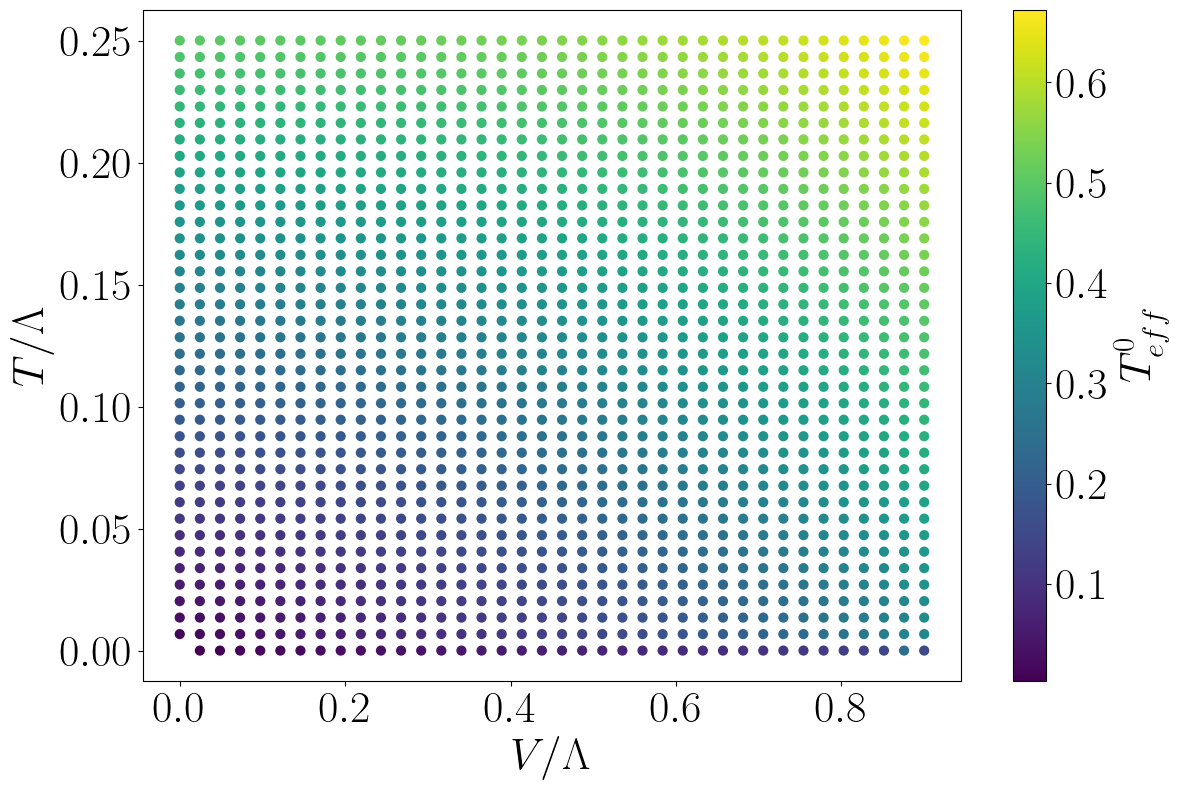

In [11]:

###* Keldysh NonInt Case

voltageSpace = domain[1:,1]
TvalueSpace = domain[1:,-1]

TeffNonInt = 0.5/dFomegaNonInt[1:]/2

x = voltageSpace
y = TvalueSpace
z = TeffNonInt


fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = plt.scatter(x/2, y/2, c=z, cmap='viridis', s=40)
cbar = plt.colorbar(sc)
cbar.set_label(r'$T_{eff}^{0}$', fontsize=32)
cbar.ax.tick_params(labelsize=32)


plt.xlabel(r'$V/\Lambda$', fontsize=32)
plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

plt.tight_layout()
# plt.savefig('panelsCurrentNoise/Teff_0_VT.png', bbox_inches='tight', dpi=600)

In [12]:

voltageNewSpace = np.linspace(1e-4, 1.8, 100)
TNewSpace = np.linspace(1e-4, 0.5, 50)
lambdaSamples = np.array([1.0])

phiConstantInit = 0.5
phiLambdaInit = 0.9
couplingValue = 0.7

def computeSaddlePoints(lambdaSamples, Tvalue, voltageSpacePlot, pbar=None):
    
    saddle_points = np.zeros(len(voltageSpacePlot), dtype=float)
    lambdaValue = lambdaSamples[0]
    for i in range(len(voltageSpacePlot)):
        voltageValue = voltageSpacePlot[i]
        result = scipy.optimize.root(MFv2.computeMFLambda, phiConstantInit, args=(lambdaValue, voltageValue, Tvalue, MFv2.Impy, couplingValue), method='lm', tol=1e-6)
        saddle_points[i] = result.x[0]
            
        if pbar is not None:
            pbar.update(1)
    
    return saddle_points


phi_voltage_T = np.zeros((len(TNewSpace), len(voltageNewSpace)), dtype=float)
pbar = tqdm(total=len(TNewSpace)*len(voltageNewSpace), desc='Computing phi(T)')

for i in range(len(TNewSpace)):
    Tvalue = TNewSpace[i]
    phi_voltage_T[i,:] = computeSaddlePoints(lambdaSamples, Tvalue, voltageNewSpace, pbar=pbar)
pbar.close()

Computing phi(T):   0%|          | 0/5000 [00:00<?, ?it/s]

Computing phi(T): 100%|██████████| 5000/5000 [11:18<00:00,  7.37it/s]


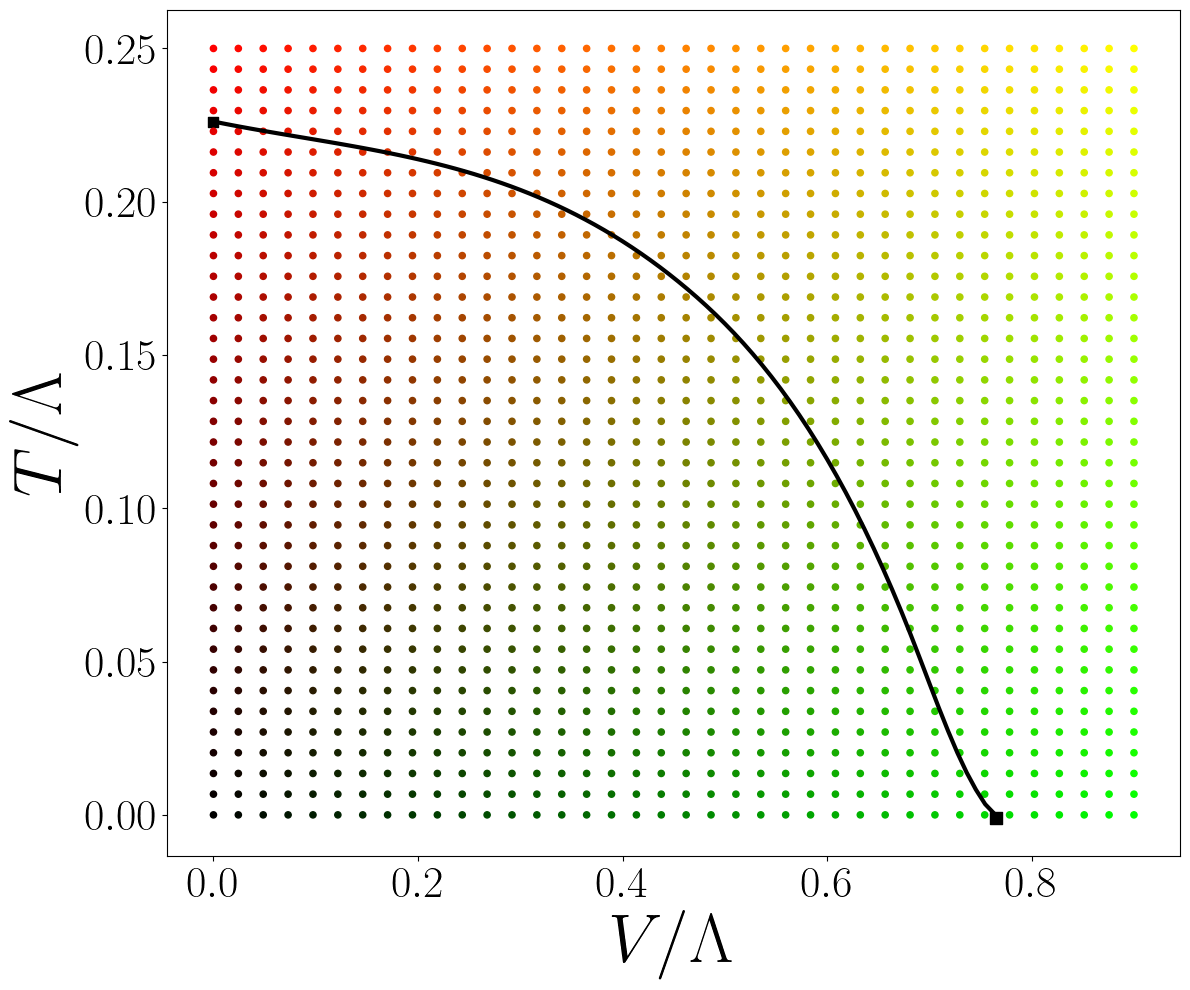

In [13]:

counter = 37

def find_critical_point(x_data, y_data):
    try:
        idx = np.where(y_data > 1e-5)[0]
        x_critical = x_data[idx[-1]+1]
        y_critical = y_data[idx[-1]+1]
    except:
        x_critical = 1e-10
        y_critical = 1e-20
    
    return x_critical, y_critical

T_critical_vec = np.array([find_critical_point(TNewSpace, phi_voltage_T[:, idx])[0] for idx in range(phi_voltage_T.shape[1])])


T_critical_spline = scipy.interpolate.UnivariateSpline(voltageNewSpace, T_critical_vec, s=0.01)
T_critical_spline_vec = np.abs(T_critical_spline(voltageNewSpace))
T_critical_spline_vec[voltageNewSpace > 1.53] = np.nan


n_points_x = 38
n_points_y = 38

x_min, x_max = np.min(voltageNewSpace)/2, np.max(voltageNewSpace)/2
y_min, y_max = np.min(TNewSpace)/2, np.max(TNewSpace)/2


x = np.linspace(x_min, x_max, n_points_x)
y = np.linspace(y_min, y_max, n_points_y)
X, Y = np.meshgrid(x, y)

X_flat = X.flatten()
Y_flat = Y.flatten()

R = (X_flat - x_min) / (x_max - x_min)
G = (Y_flat - y_min) / (y_max - y_min)
B = np.zeros_like(R)

colors = np.stack((G, R, B), axis=1)
colors_mod = colors[counter:]

fig, ax = plt.subplots(figsize=(12, 10))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
ax.plot(voltageNewSpace/2, T_critical_spline_vec/2, linewidth=3.0, color="black")
ax.scatter(voltageNewSpace[0]/2, T_critical_spline_vec[0]/2, marker="s", color="black", s=60)
ax.scatter(1.53/2, T_critical_spline(1.53)/2, marker="s", color="black", s=70)

ax.scatter(X_flat, Y_flat, color=colors, s=20)

ax.tick_params(axis='y', labelsize=32)
ax.tick_params(axis='x', labelsize=32)

plt.xlabel(r'$V/\Lambda$', fontsize=50)
plt.ylabel(r'$T/\Lambda$', fontsize=50)

plt.tight_layout()
plt.savefig('panelsCurrentNoise/phaseDiagram.png', bbox_inches='tight', dpi=600)

In [36]:
print(T_critical_spline_vec)

[0.4523352  0.45112598 0.44995707 0.44882372 0.44772117 0.44664465
 0.44558941 0.44455069 0.44352371 0.44250372 0.44148597 0.44046568
 0.43943809 0.43839845 0.43734199 0.43626395 0.43515957 0.43402408
 0.43285274 0.43164076 0.4303834  0.42907589 0.42771347 0.42629138
 0.42480485 0.42324913 0.42161945 0.41991105 0.41811917 0.41623905
 0.41426593 0.41219504 0.41002163 0.40774093 0.40534818 0.40283862
 0.40020748 0.39745001 0.39456145 0.39153702 0.38837198 0.38506156
 0.381601   0.37798553 0.3742104  0.37027084 0.36616209 0.36187939
 0.35741798 0.3527731  0.34793998 0.34291165 0.33767229 0.33220385
 0.32648829 0.32050758 0.31424367 0.30767853 0.30079411 0.29357238
 0.28599529 0.2780448  0.26970288 0.26095149 0.25177258 0.24214811
 0.23206005 0.22149036 0.21042099 0.1988339  0.18671106 0.17403443
 0.16078596 0.14694762 0.13250136 0.11742915 0.10178217 0.08588848
 0.07014537 0.05495014 0.04070007 0.02779245 0.01655657 0.00704969
 0.00073893        nan        nan        nan        nan       

In [37]:
V_flip_all =  np.array([0.0, 0.030833333333333334, 0.05791666666666667, 0.07416666666666667, 0.085, 0.09041666666666667, 0.09583333333333334, 0.10125, 0.10666666666666667, 0.11208333333333334, 0.11, 0.11285714285714285, 0.11571428571428571, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858, 0.11857142857142858])
T_flip_all = np.array([0.4523352, 0.4354166666666667, 0.4208333333333333, 0.40625, 0.3916666666666666, 0.3770833333333333, 0.36249999999999993, 0.34791666666666665, 0.3333333333333333, 0.31875, 0.30670833333333336, 0.29341666666666666, 0.280125, 0.26683333333333337, 0.25354166666666667, 0.24025000000000002, 0.22695833333333335, 0.21366666666666667, 0.200375, 0.18708333333333332, 0.17379166666666668, 0.1605, 0.14720833333333333, 0.13391666666666668, 0.12062500000000001, 0.10733333333333334, 0.09404166666666666, 0.08075, 0.06745833333333334, 0.05416666666666667, 0.040875, 0.027583333333333335, 0.014291666666666668, 0.0])

/var/folders/l6/sz7h_28d1vn668qy7qlhpvzw0000gn/T/ipykernel_23513/983058473.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_neg = cm.get_cmap('viridis_r', 256)
/var/folders/l6/sz7h_28d1vn668qy7qlhpvzw0000gn/T/ipykernel_23513/983058473.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_pos = cm.get_cmap('plasma', 256)


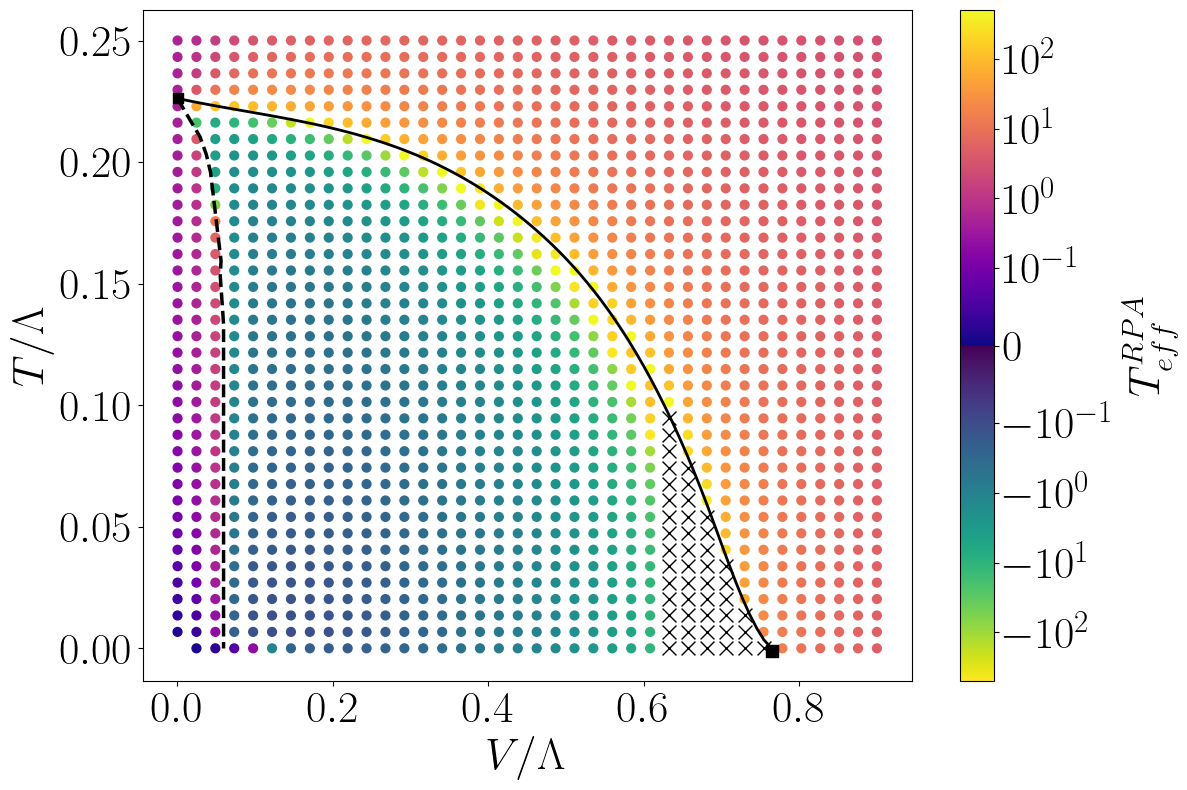

In [42]:

from matplotlib.colors import SymLogNorm
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

voltageNewSpace = np.linspace(1e-4, 1.8, 100)
TNewSpace = np.linspace(1e-4, 0.5, 50)

###* Keldysh RPA Case

voltageSpace = domain[1:,1]
TvalueSpace = domain[1:,-1]

TeffRPA = 0.5/dFomegaTotal[1:]/2

x = voltageSpace
y = TvalueSpace
z = TeffRPA

# vmin = 1e-4
# vmax = 5e2

vmax = 5e2
vmin = -vmax

cmap_neg = cm.get_cmap('viridis_r', 256) 
cmap_pos = cm.get_cmap('plasma', 256)

colors_neg = cmap_neg(np.linspace(0, 1, 256))
colors_pos = cmap_pos(np.linspace(0, 1, 256))

# Concatenate the two colormaps
all_colors = np.vstack((colors_neg, colors_pos))
custom_cmap = LinearSegmentedColormap.from_list('concatenated_map', all_colors, N=512)

norm = SymLogNorm(linthresh=0.1, vmin=vmin, vmax=vmax)



fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

mask_V = np.logical_and(voltageSpace/2 > 0.61, voltageSpace/2 < 0.8)
T_critical_spline = scipy.interpolate.UnivariateSpline(voltageNewSpace, T_critical_vec, s=0.01)
Tcrit_mask = T_critical_spline(voltageSpace)
mask_end = np.logical_and(TvalueSpace < Tcrit_mask, mask_V)

z[mask_end] = None

sc = plt.scatter(x/2, y/2, c=z, cmap=custom_cmap, norm=SymLogNorm(linthresh=0.1, vmin=vmin, vmax=vmax), s=40)

# sc = plt.scatter(x/2, y/2, c=z, cmap='viridis', norm=LogNorm(vmin=vmin, vmax=vmax), s=40)

ax.plot(voltageNewSpace/2, T_critical_spline_vec/2, linewidth=2.0, color="black")
ax.scatter(voltageNewSpace[0]/2, T_critical_spline_vec[0]/2, marker="s", color="black", s=60)
ax.scatter(1.53/2, T_critical_spline(1.53)/2, marker="s", color="black", s=70)

ax.plot(V_flip_all/2, T_flip_all/2, linewidth=2.5, color="black", linestyle="dashed")


# ticks = [-500, -100, -1, -0.1, 0, 0.1, 1, 100, 500]

cbar = plt.colorbar(sc)
cbar.set_label(r'$T_{eff}^{RPA}$', fontsize=32)
cbar.ax.tick_params(labelsize=32)

plt.scatter(x[mask_end]/2, y[mask_end]/2, c='black', marker='x', s=100,  linewidths=1)


plt.xlabel(r'$V/\Lambda$', fontsize=32)
plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

plt.tight_layout()
plt.savefig('panelsCurrentNoise/Teff_RPA_VT_mod2.png', bbox_inches='tight', dpi=600)

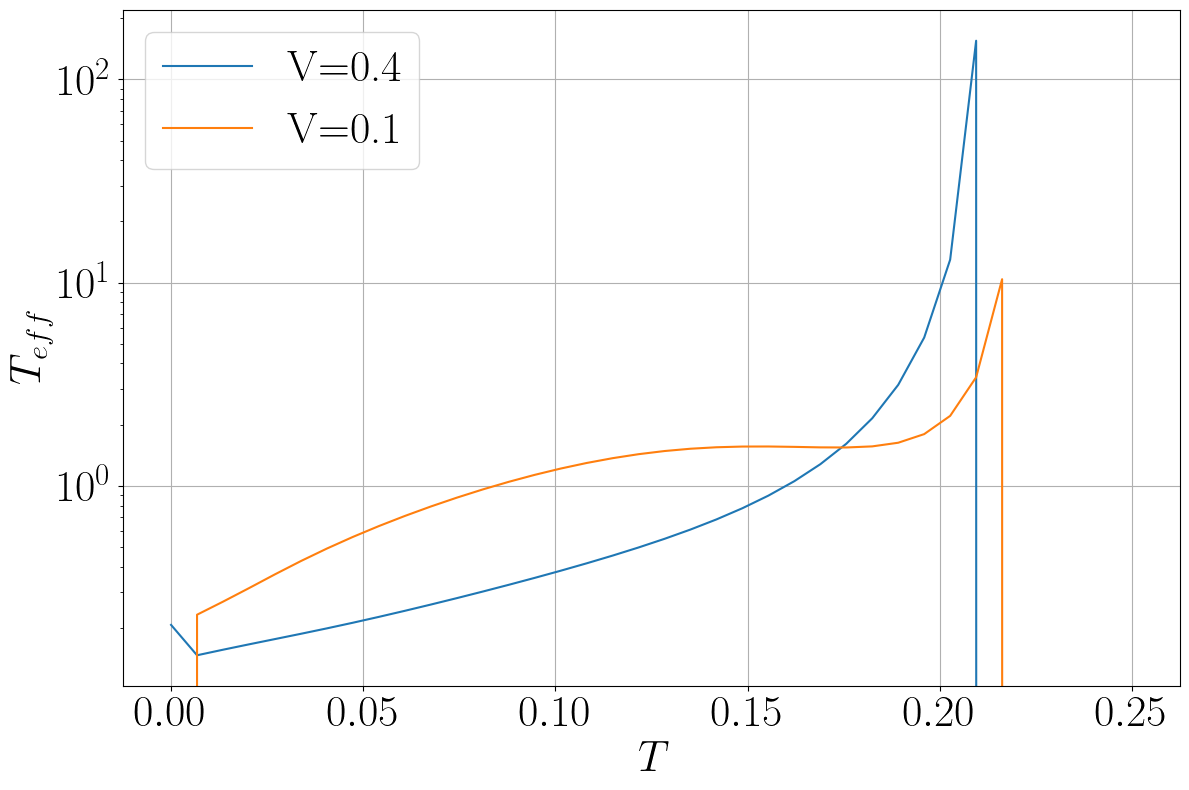

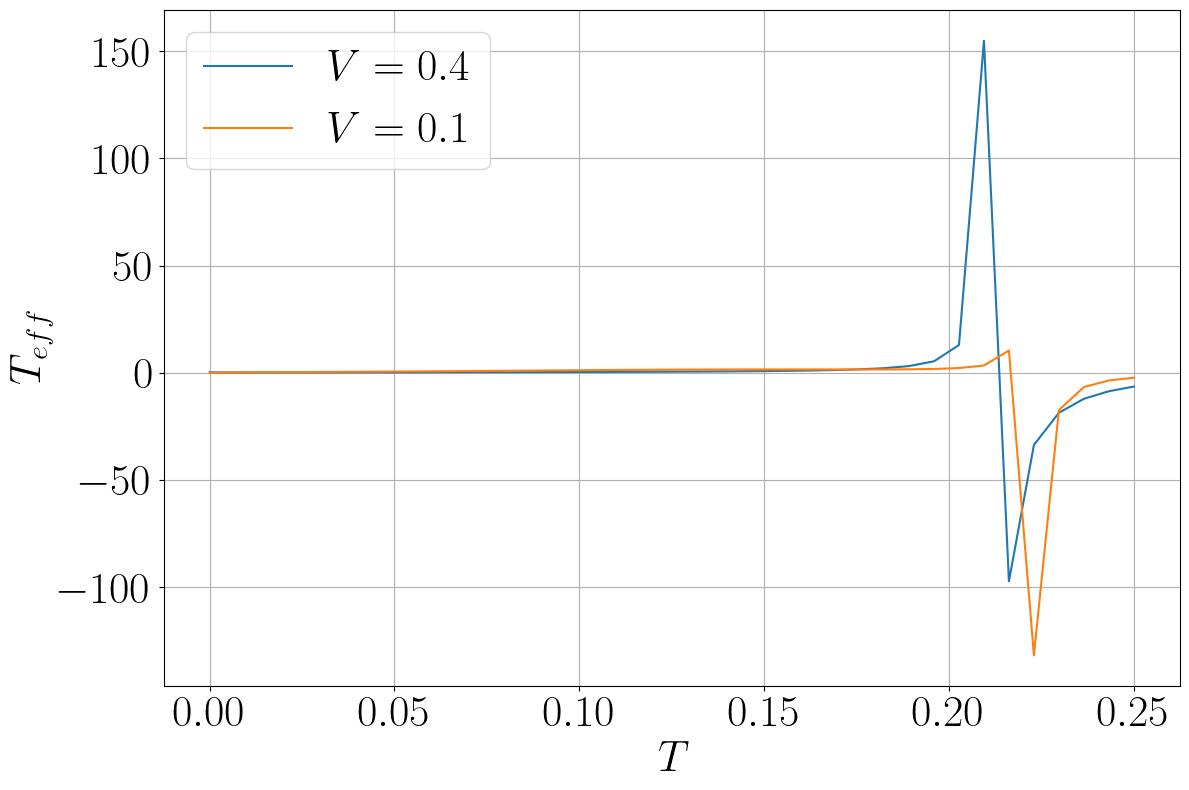

In [ ]:

maskCheck = np.logical_and(voltageSpace >0.4, voltageSpace < 0.45)
x_mod1 = voltageSpace[maskCheck]
y_mod1 = TvalueSpace[maskCheck]
z_mod1 = TeffRPA[maskCheck]


maskCheck = np.logical_and(voltageSpace >0.1, voltageSpace < 0.15)
x_mod2 = voltageSpace[maskCheck]
y_mod2 = TvalueSpace[maskCheck]
z_mod2 = TeffRPA[maskCheck]



fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.plot(y_mod1/2, -z_mod1, label=r"V=0.4")
plt.plot(y_mod2/2, -z_mod2, label=r"V=0.1")
plt.grid()
plt.legend(fontsize=32)
plt.xlabel(r'$T$', fontsize=32)
plt.ylabel(r'$T_{eff}$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.yscale('log')
plt.tight_layout()
plt.savefig("panelsCurrentNoise/perfil_T_log.png")



fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.plot(y_mod1/2, -z_mod1, label=r"$V=0.4$")
plt.plot(y_mod2/2, -z_mod2, label=r"$V=0.1$")
plt.grid()
plt.legend(fontsize=32)
plt.xlabel(r'$T$', fontsize=32)
plt.ylabel(r'$T_{eff}$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.tight_layout()
plt.savefig("panelsCurrentNoise/perfil_T.png")

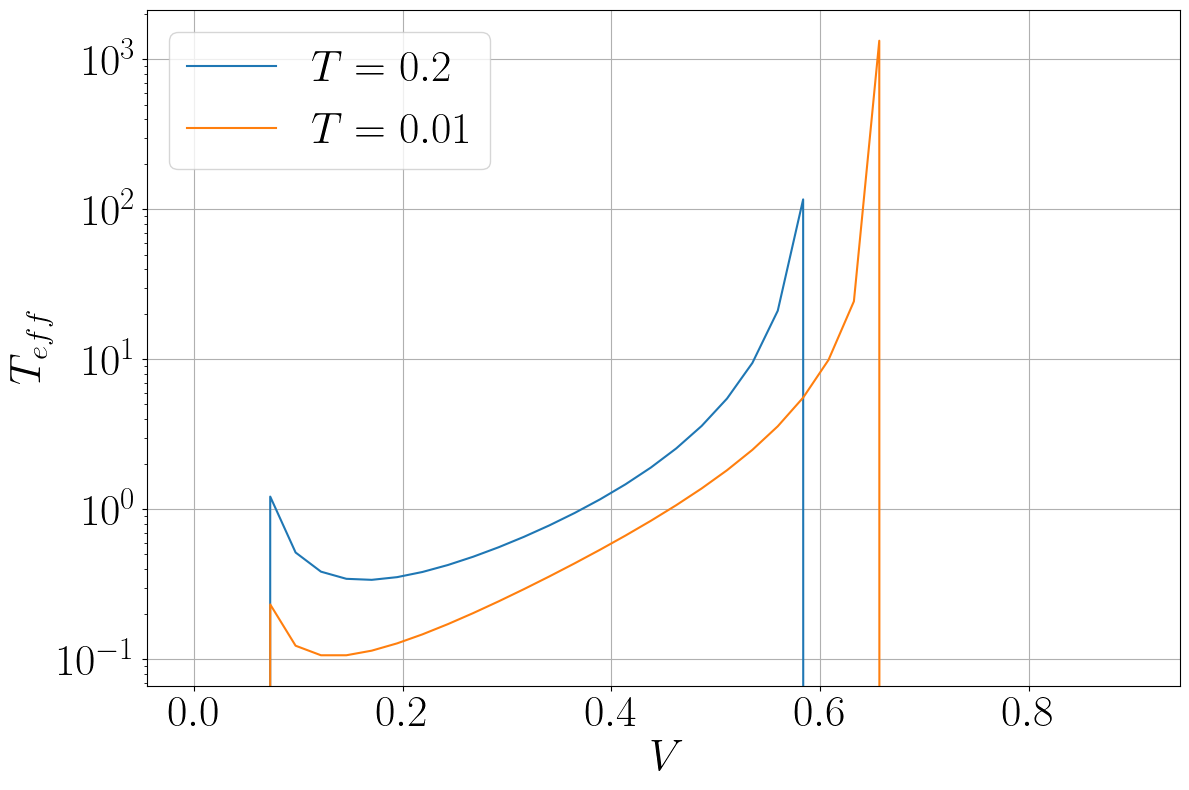

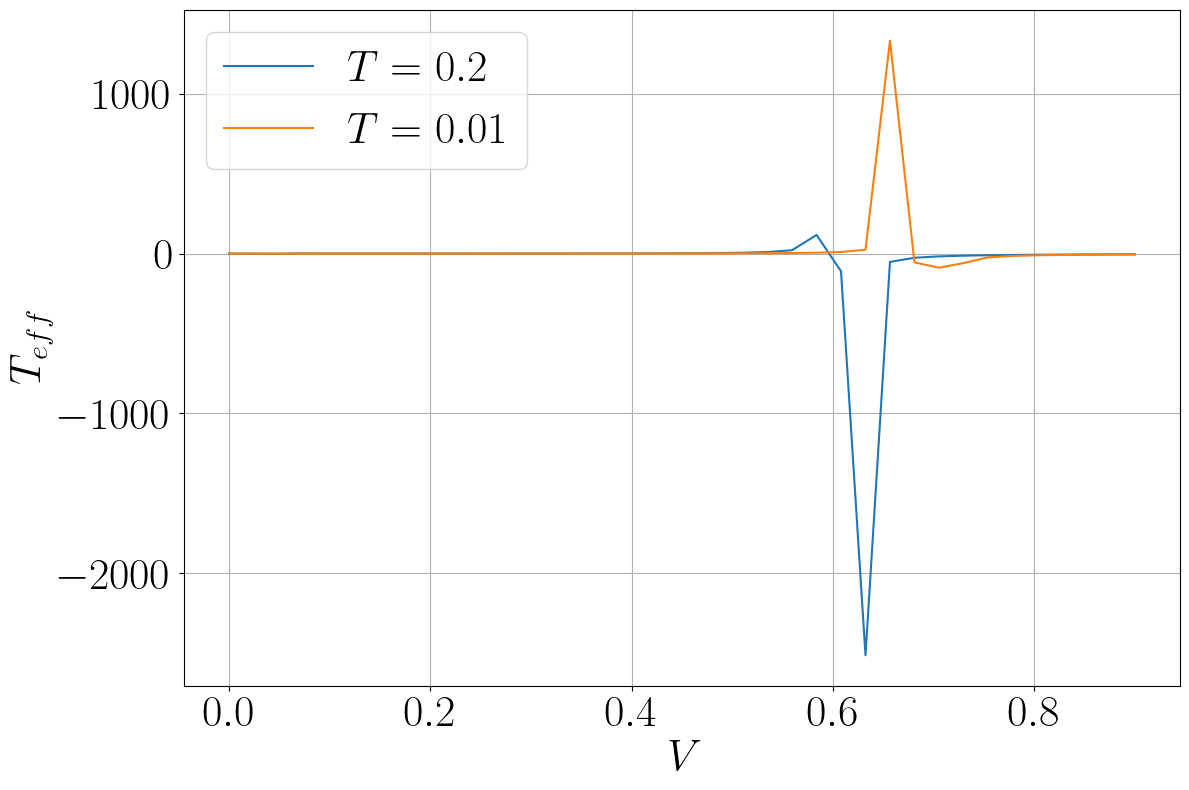

In [ ]:
# 
maskCheck = np.logical_and(TvalueSpace > 0.2, TvalueSpace < 0.21)
x_mod1 = voltageSpace[maskCheck]
y_mod1 = TvalueSpace[maskCheck]
z_mod1 = TeffRPA[maskCheck]


maskCheck = np.logical_and(TvalueSpace > 0.01, TvalueSpace < 0.02)
x_mod2 = voltageSpace[maskCheck]
y_mod2 = TvalueSpace[maskCheck]
z_mod2 = TeffRPA[maskCheck]




fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.plot(x_mod1/2, -z_mod1, label=r"$T=0.2$" )
plt.plot(x_mod2/2, -z_mod2, label=r"$T=0.01$")
plt.grid()
plt.legend(fontsize=32)
plt.xlabel(r'$V$', fontsize=32)
plt.ylabel(r'$T_{eff}$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.yscale('log')
plt.tight_layout()
plt.savefig("panelsCurrentNoise/perfil_V_log.png")



fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.plot(x_mod1/2, -z_mod1, label=r"$T=0.2$")
plt.plot(x_mod2/2, -z_mod2, label=r"$T=0.01$")
plt.grid()
plt.legend(fontsize=32)
plt.xlabel(r'$V$', fontsize=32)
plt.ylabel(r'$T_{eff}$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)
plt.tight_layout()
plt.savefig("panelsCurrentNoise/perfil_V.png")


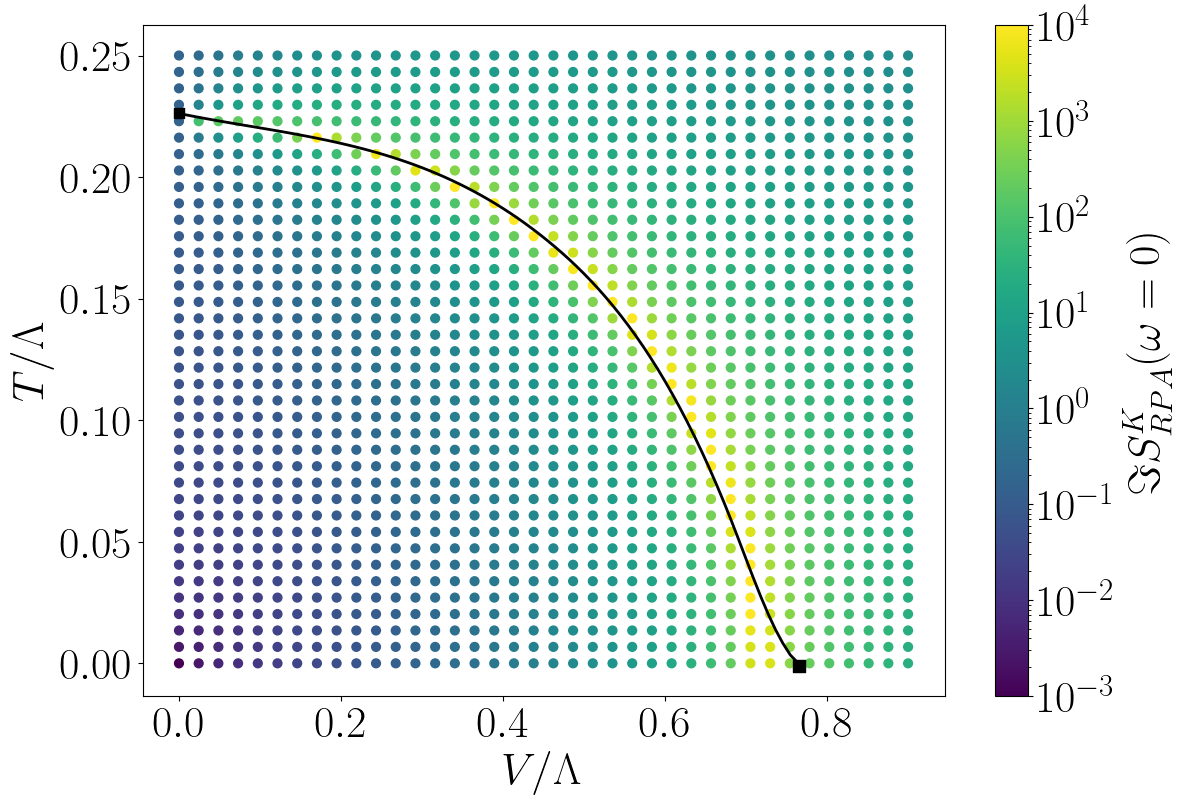

In [ ]:

voltageSpace = domain[:,1]
TvalueSpace = domain[:,-1]

x = voltageSpace
y = TvalueSpace
z = keldyshTotOne[:, 1]

vmin = 1e-3
vmax = 1e4

fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
sc = plt.scatter(x/2, y/2, c=z, cmap='viridis', norm=LogNorm(vmin=vmin, vmax=vmax), s=40)
cbar = plt.colorbar(sc)
cbar.set_label(r'$\Im S_{RPA}^K(\omega=0)$', fontsize=32)
cbar.ax.tick_params(labelsize=32)

ax.plot(voltageNewSpace/2, T_critical_spline_vec/2, linewidth=2.0, color="black")
ax.scatter(voltageNewSpace[0]/2, T_critical_spline_vec[0]/2, marker="s", color="black", s=60)
ax.scatter(1.53/2, T_critical_spline(1.53)/2, marker="s", color="black", s=70)

plt.xlabel(r'$V/\Lambda$', fontsize=32)
plt.ylabel(r'$T/\Lambda$', fontsize=32)
ax.tick_params(axis='x', labelsize=32)
ax.tick_params(axis='y', labelsize=32)

plt.tight_layout()
plt.savefig('panelsCurrentNoise/ImSK_RPA_VT.png', bbox_inches='tight', dpi=600)